# ASSIGNMENT 7
  --------------------------

# Question-1

# > HIERARCHICAL CLUSTERING <

In [1]:
# IMPORT BASIC LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# READING THE FILE
c_data=pd.read_csv("crime_data.csv")
c_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# ...using Normalization

In [3]:
# MANUALLY DEFINING NORMALIZATION FUNCTION
def norm_func(i):
    s=(i-i.min())/(i.max()-i.min())
    return (s)

In [4]:
# APPLYING NORMALIATION ON THE REQUIRED NUMERICAL DATA
norm_c_data=norm_func(c_data.iloc[:,1:])
norm_c_data #NORMALIZED CRIME DATA

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [5]:
# NORMALIZING THE DATA USING MINMAXSCALER LIBRARY 
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
trans_c_data=pd.DataFrame(trans.fit_transform(c_data.iloc[:,1:]))
trans_c_data

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# MODEL BUILDING

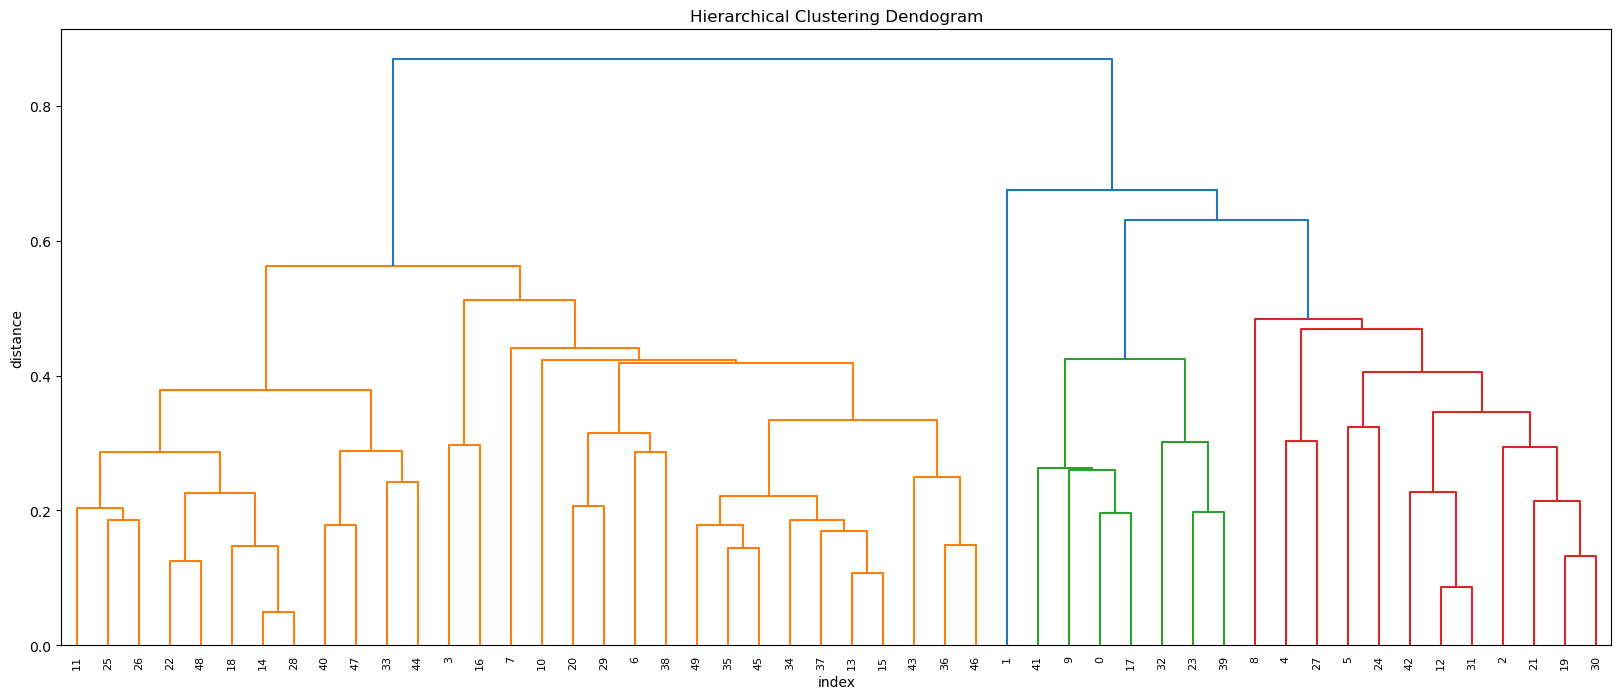

In [6]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
lin=linkage(trans_c_data, method="average", metric="euclidean")
plt.figure(figsize=(20,8))
plt.xlabel("index")
plt.ylabel("distance")
plt.title("Hierarchical Clustering Dendogram")
sch.dendrogram(lin)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=4, linkage="average").fit(trans_c_data)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
trans_c_data["clust"]=cluster_labels
trans_c_data

,0,1,2,3,clust
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [8]:
trans_c_data.iloc[:,1:].groupby(trans_c_data.clust).mean()

,1,2,3,clust
clust,,,,
0,0.237785,0.536158,0.223342,0.0
1,0.725742,0.785311,0.644703,1.0
2,0.746575,0.271186,0.961240,2.0
3,0.706458,0.377724,0.371724,3.0


In [9]:
crime_data=trans_c_data[trans_c_data.clust==0]
crime_data

,0,1,2,3,clust
3,0.481928,0.496575,0.305085,0.315245,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
10,0.271084,0.003425,0.864407,0.333333,0
11,0.108434,0.256849,0.372881,0.178295,0
13,0.385542,0.232877,0.559322,0.354005,0
14,0.084337,0.037671,0.423729,0.103359,0
15,0.313253,0.239726,0.576271,0.276486,0
16,0.536145,0.219178,0.338983,0.232558,0
18,0.078313,0.130137,0.322034,0.012920,0


In [10]:
crime_data=trans_c_data[trans_c_data.clust==1]
crime_data

,0,1,2,3,clust
2,0.439759,0.852740,0.813559,0.612403,1
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
8,0.879518,0.993151,0.813559,0.635659,1
12,0.578313,0.698630,0.864407,0.431525,1
19,0.632530,0.873288,0.593220,0.529716,1
21,0.680723,0.719178,0.711864,0.718346,1
24,0.493976,0.455479,0.644068,0.540052,1
27,0.686747,0.708904,0.830508,1.000000,1
30,0.638554,0.821918,0.644068,0.640827,1


In [11]:
crime_data=trans_c_data[trans_c_data.clust==2]
crime_data

,0,1,2,3,clust
1,0.554217,0.746575,0.271186,0.96124,2


In [12]:
crime_data=trans_c_data[trans_c_data.clust==3]
crime_data

,0,1,2,3,clust
0,0.746988,0.654110,0.440678,0.359173,3
9,1.000000,0.568493,0.474576,0.478036,3
17,0.879518,0.698630,0.576271,0.385013,3
23,0.921687,0.732877,0.203390,0.253230,3
32,0.734940,1.000000,0.220339,0.227390,3
39,0.819277,0.801370,0.271186,0.392765,3
41,0.746988,0.489726,0.457627,0.506460,3


# ...using Standardization

In [13]:
# IMPORTING STANDARDSCALER LIBRARY AND STANDARDIZING THE DATA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_data=pd.DataFrame(scaler.fit_transform(c_data.iloc[:,1:5]))
std_data

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# MODEL BUILDING

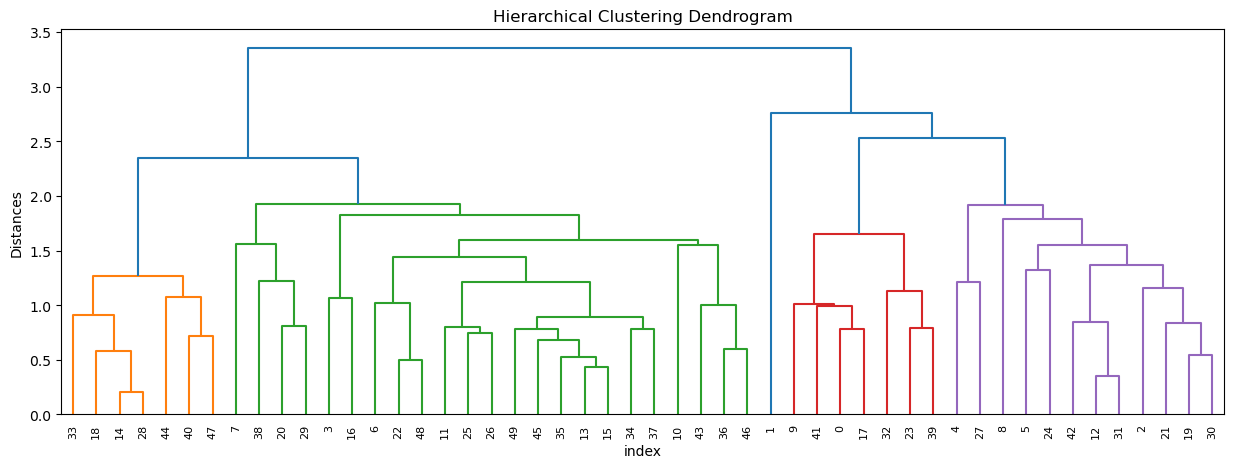

In [14]:
lin=linkage(std_data,method="average",metric="euclidean")
plt.figure(figsize=(15,5))
sch.dendrogram(lin)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("index")
plt.ylabel("Distances")
plt.show()

In [15]:
# CLUSTERS MAKING AND APPENDING THE CLUST TO DATA TABLE
c_complete=AgglomerativeClustering(n_clusters=4, linkage="average", affinity="euclidean").fit(std_data)
cluster_labels=pd.Series(c_complete.labels_)
cluster_labels
std_data["clust"]=cluster_labels
std_data

,0,1,2,3,clust
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,2
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,3


In [16]:
# GROUPING THE DATA CLUSTERWISE
std_data.iloc[:,:].groupby(std_data.clust).mean()

,0,1,2,3
clust,,,,
0,-0.676758,-0.682747,-0.133061,-0.570376
1,0.717886,1.044322,0.892810,1.188277
2,0.513019,1.118060,-1.224067,2.509424
3,1.596441,0.976068,-0.785405,0.048933


In [17]:
# TO GET THE ITEMS IN CLUSTER-0
data=std_data[std_data.clust==0]
data

,0,1,2,3,clust
3,0.234708,0.233212,-1.084492,-0.186794,0
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
10,-0.577030,-1.512241,1.218484,-0.111300,0
11,-1.203228,-0.615272,-0.805344,-0.758392,0
13,-0.136372,-0.700121,-0.037685,-0.025021,0
14,-1.295998,-1.391029,-0.595982,-1.071153,0
15,-0.414682,-0.675878,0.032102,-0.348567,0
16,0.443441,-0.748605,-0.944918,-0.531910,0
18,-1.319191,-1.063757,-1.014705,-1.448624,0


In [18]:
# TO GET THE ITEMS IN CLUSTER-1
data=std_data[std_data.clust==1]
data

,0,1,2,3,clust
2,0.072361,1.493817,1.009122,1.053466,1
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
8,1.765415,1.990786,1.009122,1.150530,1
12,0.605789,0.948363,1.218484,0.298525,1
19,0.814521,1.566544,0.101889,0.708350,1
21,1.000062,1.021090,0.590399,1.495646,1
24,0.281093,0.087757,0.311251,0.751490,1
27,1.023254,0.984726,1.078909,2.671197,1
30,0.837714,1.384726,0.311251,1.172100,1


In [19]:
# TO GET ITEMS IN CLUSTER-2
data=std_data[std_data.clust==2]
data

,0,1,2,3,clust
1,0.513019,1.11806,-1.224067,2.509424,2


In [20]:
# TO GET ITEMS IN CLUSTER-3
data=std_data[std_data.clust==3]
data

,0,1,2,3,clust
0,1.255179,0.790787,-0.526195,-0.003451,3
9,2.229265,0.487757,-0.386621,0.492653,3
17,1.765415,0.948363,0.032102,0.104398,3
23,1.927762,1.069575,-1.503215,-0.445631,3
32,1.208794,2.015028,-1.433428,-0.553480,3
39,1.533490,1.311999,-1.224067,0.136752,3
41,1.255179,0.208970,-0.456408,0.611287,3


# -------------------------------------------------------------------------------------------------------------

# > KMEANS CLUSTERING <

In [21]:
# NORMALISZED DATA
norm_c_data

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


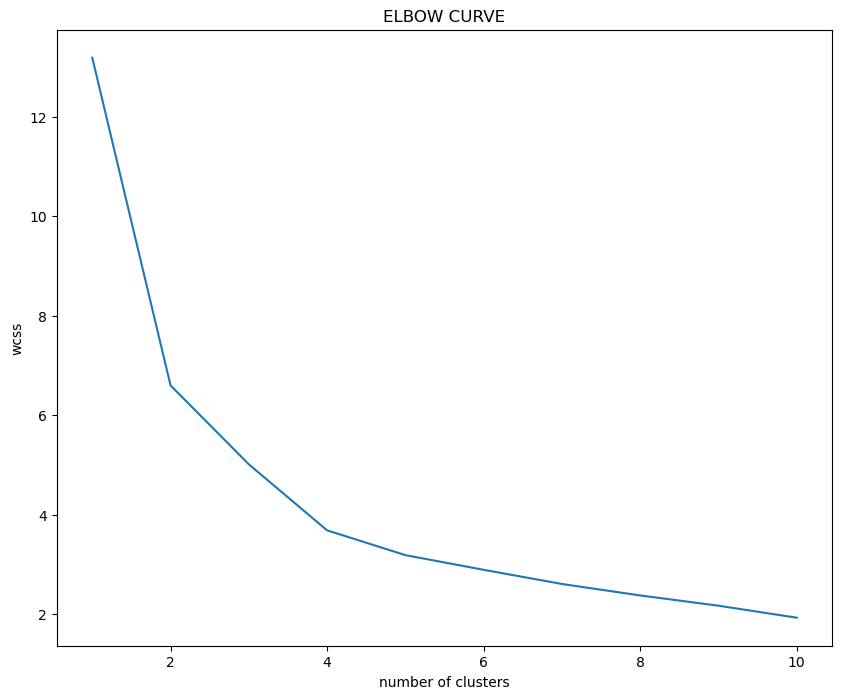

In [22]:
# IMPORTING K-MEANS LIBRARY
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
# CREATING (WITH IN CLUSTER SUM OF SQUARES) WCSS
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(norm_c_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.title("ELBOW CURVE")
plt.show()

THE ABOVE (SCREENPLOT) OR ELBOW CURVE SHOWS THAT DECREASE OF WCSS WITH AN INCREASE OF NUMBER OF CLUSTERS(K), WHEN THERE IS
NO SLIGHT CHANGE IN WCSS AS WE INCREASE THE K-MEANS THAT POINT OF K_VALUE IS THE APPROPRIATE K-VALUE FOR THE MODEL. HERE WE ASSUME OUR K-VALUE AS 4

#  MODEL BUILDING

In [23]:
model=KMeans(n_clusters=4)
model.fit(norm_c_data)
model.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [24]:
k=pd.Series(model.labels_)
c_data["clust"]=k # APPENDING CLUSTERS TO THAT DATA TABLE
c_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [25]:
# GROUPING THE CLUSTERS BY MAKING THE AVERAGE OF OBSERVATIONS IN EACH CLUSTER
c_data.iloc[:,1:].groupby(c_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,3.600000,78.538462,52.076923,12.176923,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,13.937500,243.625000,53.750000,21.412500,2.0
3,5.852941,141.176471,73.647059,19.335294,3.0


In [26]:
data=c_data[c_data.clust==0]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0


In [27]:
data=c_data[c_data.clust==1]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [28]:
data=c_data[c_data.clust==2]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [29]:
data=c_data[c_data.clust==3]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
10,Hawaii,5.3,46,83,20.2,3
13,Indiana,7.2,113,65,21.0,3
15,Kansas,6.0,115,66,18.0,3
20,Massachusetts,4.4,149,85,16.3,3
24,Missouri,9.0,178,70,28.2,3
29,New Jersey,7.4,159,89,18.8,3
34,Ohio,7.3,120,75,21.4,3
35,Oklahoma,6.6,151,68,20.0,3


In [30]:
# WITH IN CLUSTER SUM OF SQUARES
wcss

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859134,
 3.185021932472433,
 2.8901613061914744,
 2.605297607238968,
 2.3746491448319063,
 2.1682450362011156,
 1.9268578581022706]

>> COUNTRIES  IN  CLUSTER"0"  HAS  HIGHER  ASSAULT, URBAN  POPULATION  AND  RAPE  RATE,  WHERE  AS  COUNTRIES  IN  CLUSTER"3" HAS  HIGHEST   MURDER RATE

In [31]:
# WITH IN CLUSTER SUM OF SQUARES
wcss

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859134,
 3.185021932472433,
 2.8901613061914744,
 2.605297607238968,
 2.3746491448319063,
 2.1682450362011156,
 1.9268578581022706]

# ---------------------------------------------------------------------------------------------------------------

#  >DB SCAN<

In [3]:
# IMPORTING BASIC LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [5]:
# READING THE DATASET
data=pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [85]:
# DROPPING THE FIRST COLUMN AS IT IS NOT REQUIRED
Data=data.iloc[:,1:]
Data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [86]:
# STANDARDIZING THE DATA(Z_SCORE)
standardization=StandardScaler()
crime=standardization.fit_transform(Data)
crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [87]:
# K DISTANCE GRAPH GIVES THE APPROX EPS VALUE
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=8)
nbrs=neighbors.fit(crime)
distances,indices=nbrs.kneighbors(crime)

Text(0.5, 1.0, 'K DISTANCE GRAPH')

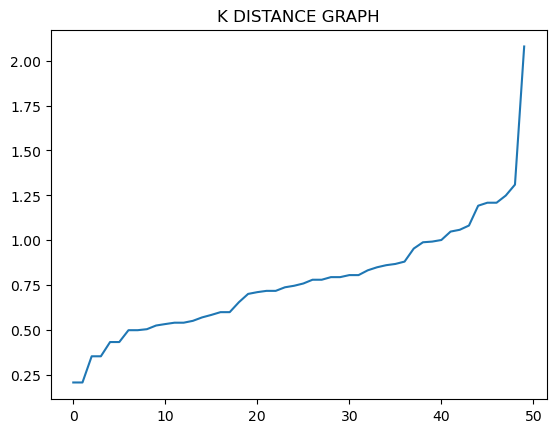

In [26]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.title("K DISTANCE GRAPH")

In [30]:
# MODEL-1 FOR FINDING THE CLUSTERS
dbscan=DBSCAN(eps=1.25,min_samples=5)
dbscan.fit(crime)
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [32]:
# LABELS
l=pd.DataFrame(dbscan.labels_,columns=["clusters"])
l

,clusters
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [38]:
# APPENDING CLUSTERS TO ORGINAL DATA
crime_1=pd.concat([data,l],axis=1)
crime_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [41]:
# SILHOUETTE SCORE GIVES THE ACCURACY OF THE MODEL
import sklearn
sklearn.metrics.silhouette_score(crime,l)

0.23869670053300915

In [82]:
# MODEL-2
dbscan1=DBSCAN(eps=1.115,min_samples=5)
dbscan1.fit(crime)
dbscan1.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [88]:
# NEW CLUSTERS
l1=pd.DataFrame(dbscan1.labels_,columns=["cluster2"])
l1

,cluster2
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [90]:
# SILHOUETTE SCORE FOR MODEL-1
sklearn.metrics.silhouette_score(crime,l)

0.23869670053300915

In [89]:
# SILHOUETTE SCORE FOR MODEL-2
sklearn.metrics.silhouette_score(crime,l1)

0.3907373331499921

AS THE SILHOUETTE SCORE OF MODEL-1 IS LESS(0.23869670053300915), SO WE IMPROVED A NEW MODEL-2 WITH 
SILHOUETTESCORE(0.3907373331499921). THIS MODEL GIVES US PERFECT CLUSTERS WITH HOMOGENEOUS OBSERVATIONS IN THE DATA


# ---------------------------------------------------------------------------------------------------------------